**Comparing signifigance between jet and ENSO with precipitation in California.**

Referenced articles:

"Seasonal Noise Versus Subseasonal Signal: Forecasts of California Precipitation During the Unusual Winters of 2015-2016 and 2016-2017" Shuguang Wang, Alek Anichowski, Michael Tippett, Adam Sobel

"What is the variability in US west coast winter precipitation during strong El Niño events" Arun Kumar, Mingyue Chen 


**Data** 

 All Data is taken from the IRI data library
 
**Precipitation data**:  NOAA NCEP CEC Unified Precipitation Gauge Continental United States Realtime Rain Precipitation Data (We looked at precipitation both in 1 degree and half degree increments) 

**El Nino/SST**: NOAA NCDC ERSST version5 sst anomalies: Extended reconstructed sea surface temperature data

**Jet data**: NOAA NCEP-DOE Reanalysis-2 Monthly pgb ugrdprs zonal wind data



In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import cartopy as ccrs
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
precipurlbymonth="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28130W%29/%28100W%29/RANGE/Y/25/50/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
ninourl="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/.version5/.sst/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/%5BX/Y%5Daverage/zlev/removeGRID/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/yearly-anomalies/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
windurl="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/SOURCES/.NOAA/.NCEP-DOE/.Reanalysis-2/.Monthly/.pgb/.pgb/.ugrdprs/P/200/VALUE/X/210/240/RANGE/Y/45/60/RANGE/[X/Y]average/sub/P/removeGRID/T/(days%20since%201960-01-01)streamgridunitconvert/dods"

In [3]:
precipds=xr.open_dataset("precip_observational.nc")
ninods=xr.open_dataset("nino_observational.nc")
wind = xr.open_dataset("wind_observational.nc")


In [33]:
precipds.rain

<xarray.DataArray 'rain' (T: 480, Y: 52, X: 62)>
[1547520 values with dtype=float32]
Coordinates:
  * X        (X) float32 -130.25 -129.75 -129.25 ... -100.75 -100.25 -99.75
  * Y        (Y) float32 24.75 25.25 25.75 26.25 ... 48.75 49.25 49.75 50.25
  * T        (T) datetime64[ns] 1979-01-16T12:00:00 ... 2018-12-16T12:00:00
Attributes:
    pointwidth:          0
    long_name:           Precipitation
    standard_name:       lwe_precipitation_rate
    file_missing_value:  -999.0
    units:               mm/day
    history:             [(T:  0000 1 Jan 2006 to 0000 21 Apr 2019 appended f...

**Spatial Analysis:**

First we looked at how the data varied spatially on a partial map of the US, on a grid ranging from [25,50] Lat and [-130,-100] Lon, our data spanned from 1977-2018 and produced monthly averages. We focused on the winter months primarily: November,December,January, February (NDJF) 



Precipitation by Month: 

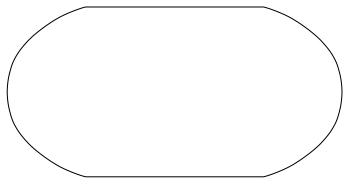

In [224]:
import cartopy.feature as cfeature
def plotmap(data,title,min1,max1,resolution="one",ax=plt.axes(projection=ccrs.crs.Robinson()),colorbar="auto"):
    central_lon, central_lat = -115, 40
    extent = [-130,-100,25, 50]
    j.set_title(title)
    j.set_extent(extent)
    j.gridlines()
    j.coastlines(resolution='50m')
    j.add_feature(cfeature.STATES)
    lons, lats = getlonlat(resolution)
    if colorbar=="auto":
        plt.colorbar(cb, cmap='nipy_spectral', orientation='vertical',ticklocation='auto')
    return j.contourf(lons, lats, data,transform=ccrs.crs.PlateCarree(),cmap='nipy_spectral',vmin=minim,vmax=maxim)
def getlonlat(resolution):
    if resolution=="half":
        lats = np.linspace(24.75,50.25, 52)
        lons= np.linspace(-130.25,-99.75,62)
    else:
        lats = np.linspace(24,51, 28)
        lons= np.linspace(-131,-99,33)
    #lons, lats = np.meshgrid(lons, lats)
    return lons, lats

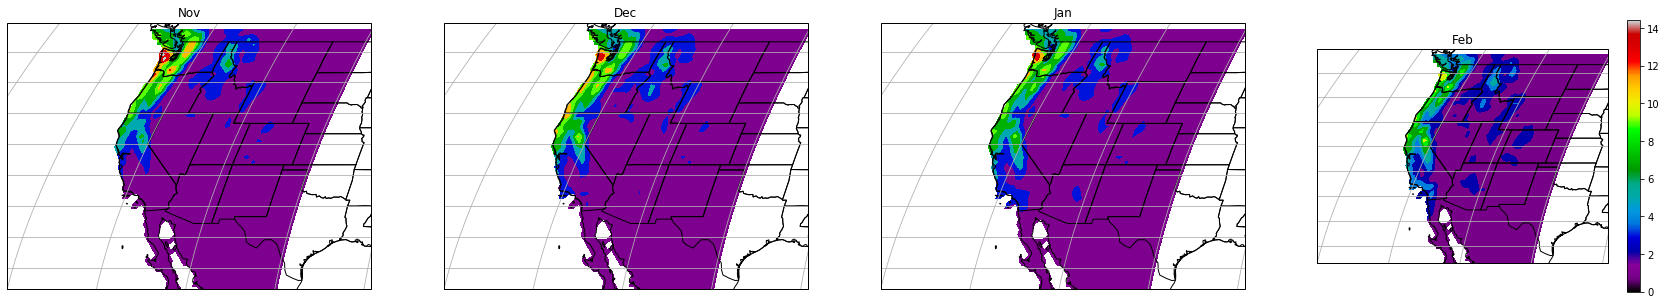

In [67]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
maxim=np.max(precipds.rain.groupby("T.month").mean("T"))
minim=np.min(precipds.rain.groupby("T.month").mean("T"))
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(precipds.rain.groupby("T.month").mean("T")[monthnum[i]],month[i],0,maxim,"half",ax=j,colorbar="nonauto")
plt.imshow(Bpn[i],vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()

As you can see, the rainfall is highest along the coasts. There is not a huge difference amonge precipitation amounts month to month however it is clear that southern California appears to get more rain in January and February then in November and December 

Correlation Values:

Correlation is defined as measure of linear relationship between some a and b values: 

$$c=\frac{cov(ab)}{s_{a}s_{b}}$$

We will now examine the correlations between precipitation,wind,sst (all 3 combinations)

Signifigance: 

We will estimate signifigance with the equation (n=40 years):

$$ \frac{2}{\sqrt{n}}=.316$$

In [34]:
precipanom=precipds.groupby('T.month') - precipds.groupby('T.month').mean('T')
Spn=(precipanom.rain*ninods.sst).groupby("T.month").mean("T")
Sn = ninods.sst.groupby('T.month').std('T')
Sp = precipanom.rain.groupby('T.month').std('T')
Cpn = Spn/Sn/Sp
windanom=wind.groupby("T.month")-wind.groupby("T.month").mean("T")
Swn=(windanom.ugrdprs*ninods.sst).groupby("T.month").mean("T")
Sw = windanom.ugrdprs.groupby('T.month').std('T')
Cwn=Swn/Sn/Sw
vn=ninods.sst.groupby('T.month').var('T')
vw=windanom.ugrdprs.groupby('T.month').var('T')
Spw=(windanom.ugrdprs*precipanom.rain).groupby("T.month").mean("T")
Cpw=Spw/Sw/Sp


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [180]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpn[i]))
    maxlist.append(np.max(Cpn[i]))

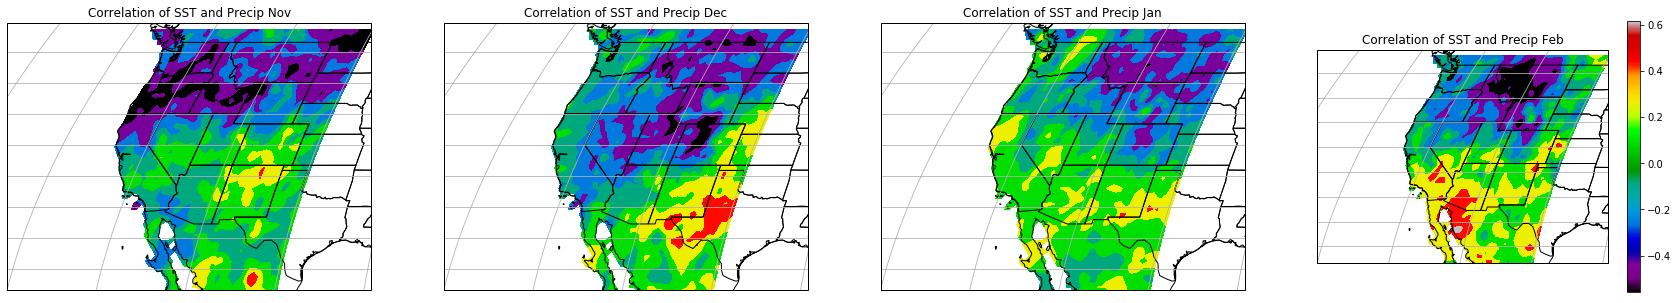

In [181]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim_cpn=np.min(minlist)
maxim_cpn=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpn[monthnum[i]],"Correlation of SST and Precip "+month[i],minim_cpn,maxim_cpn,"half",ax=j,colorbar="nonauto")
plt.imshow(Cpn[i],vmin=minim_cpn,vmax=maxim_cpn,cmap='nipy_spectral')
plt.colorbar()
plt.show()

In [182]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpw[i]))
    maxlist.append(np.max(Cpw[i]))

These graphs show the correlation between Sea Surface Temperature in the tropics and Precipitation, the northern parts have more negative correlation while the south west has higher positive correlation values. Signifigance is |.3|. For the most part, the correlations in California are less signifigant in December and November, whereas January and moreso February show higher positive correlations. 

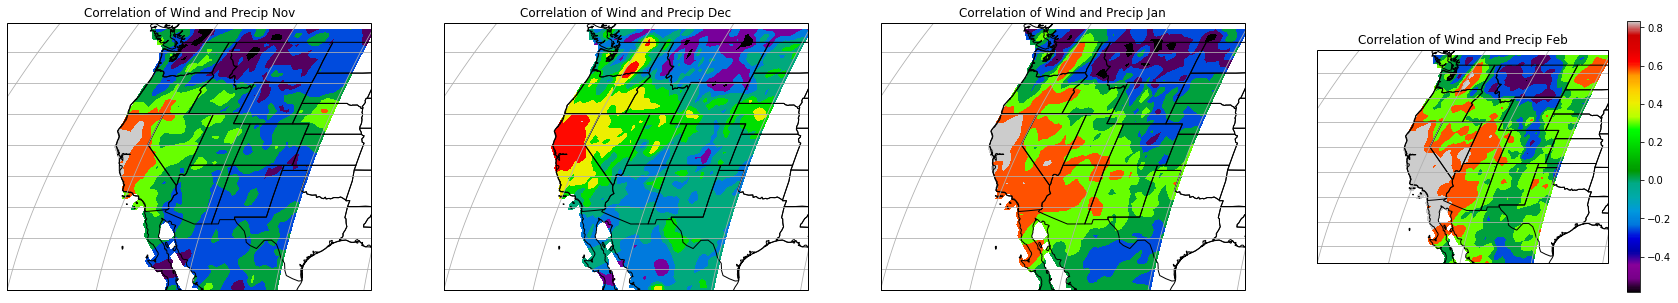

In [185]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim_cpw=np.min(minlist)
maxim_cpw=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpw[monthnum[i]],"Correlation of Wind and Precip "+month[i],minim_cpw,maxim_cpw,"half",ax=j,colorbar="nonauto")
plt.imshow(Bpn[i],vmin=minim_cpw,vmax=maxim_cpw,cmap='nipy_spectral')
plt.colorbar()
plt.show()

The wind and precipiation correlations show a clear pattern, with higher signfigiance levels centered on the central coast of California and decreasing as it goes further inland. 

Since Wind and SST are purely temporal data sets, we can examine how their correlations are related over time. Youcan see that the correlations do appear to be higher in the winter months (1,2,11,12) but also peak in april (4) 

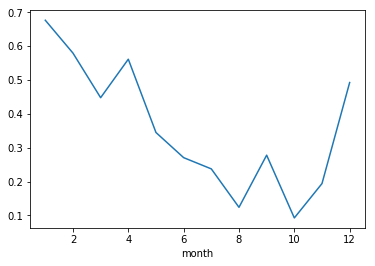

In [11]:
Cwn.plot()

This plot shows that the correlation between wind and el nino is very high in January and steadily declines with some spikes until October. Correlation levels are greater than .3 from November till June. (Winter and Spring) 

**Regression**

We will now examine single variable and multi-variable regression coefficients and look at their signifigance

Regression will be determined using linear algebra:

$$A^TAx=A^Tb$$

$$x=(A^TA)^{-1}A^Tb$$

Where $A$ is our wind/sst values, $x$ are our linear regression coefficients and $b$ are our precipiation variables.

This can be done for both single variable and multi-variable.

In addition, the following equation is also used for single-variable regression and can be used as a check for our regression algorithm: 



$$\frac{cov(a,b)}{var(a)}$$ 

Where $a$ is the indepedent variable (sst or wind) and b is the dependent variable (precipitation). 


**Single variable**

In [35]:
vn=ninods.sst.groupby('T.month').var('T')
vw=windanom.ugrdprs.groupby('T.month').var('T')
Bpn=Spn/vn
Bpw=Spw/vw

In [36]:
def getmonth(data,month):
    return data.sel(T=data["T.month"]==month)
##etmonth(ninods,1)
getmonth(precipds,1).rain.mean("T")

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'rain' (Y: 52, X: 62)>
array([[     nan,      nan,      nan, ..., 0.544729, 0.718792, 0.88776 ],
       [     nan,      nan,      nan, ..., 0.502028, 0.718437, 0.856648],
       [     nan,      nan,      nan, ..., 0.557982, 0.722352, 0.789032],
       ...,
       [     nan,      nan,      nan, ..., 0.455779, 0.509816, 0.461168],
       [     nan,      nan,      nan, ..., 0.508386, 0.545292, 0.529767],
       [     nan,      nan,      nan, ..., 0.520568, 0.564413, 0.601718]],
      dtype=float32)
Coordinates:
  * X        (X) float32 -130.25 -129.75 -129.25 ... -100.75 -100.25 -99.75
  * Y        (Y) float32 24.75 25.25 25.75 26.25 ... 48.75 49.25 49.75 50.25

In [85]:
#def multiregression(month,shape=(52,62),raindata=precipds,winddata=wind,sstdata=ninods):

def singleregression(datadep,dataind,tshape=40,shape=(52,62)):
    cons=np.empty(shape)
    residual=np.empty(shape)
    if shape==(52,62):
        x,y=getlonlat("half")
    else:
         x,y=getlonlat("one")
    coef=np.empty(shape)
    a_array=np.ones((tshape,2))
    a_array[:,0]=dataind
    for i in range(shape[0]):
        for j in range(shape[1]):
            a_matrix=np.matmul(np.transpose(a_array),a_array)
            b_array=np.array(datadep.sel(Y=y[i],X=x[j]))
            B=np.matmul(np.transpose(a_array),b_array)
            X=np.linalg.solve(a_matrix,B) 
            yhat=np.matmul(a_array,X)
            residual[i,j]=np.nansum(np.square(b_array-yhat))
            coef[i,j]=X[0]
            cons[i,j]=X[1]
    return coef,cons,residual,np.linalg.inv(a_matrix)   


Check algorithm:

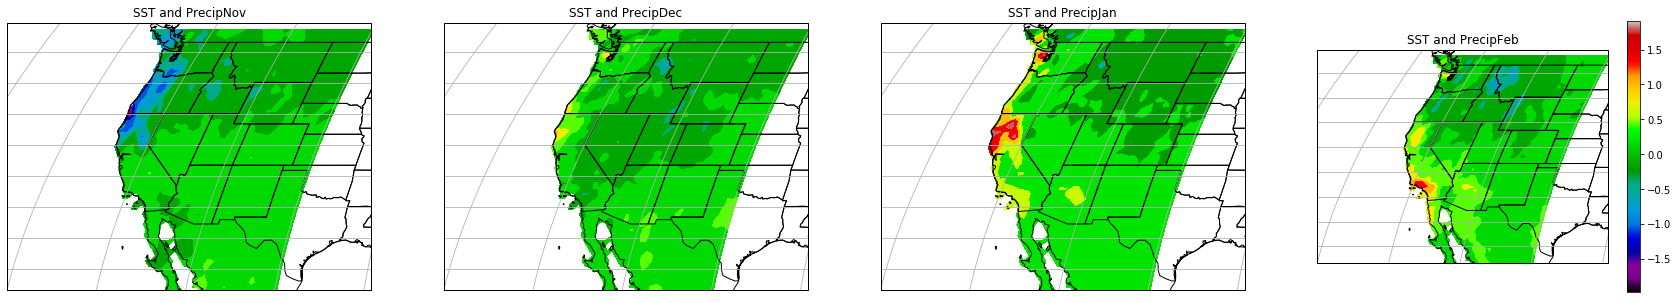

In [62]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
for i,j in enumerate(axes.flat):
    minim=np.min(Bpn)
    maxim=np.max(Bpn)
    #sst=getmonth(ninods,monthnum[i]).sst
    #rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    plotmap(Bpn[monthnum[i]-1],"SST and Precip"+month[i],minim,maxim,"half",ax=j,colorbar="nonauto")
plt.imshow(Bpn[i],vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()

In [125]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(singleregression(rain,sst)[0]))
    maxlist.append(np.nanmax(singleregression(rain,sst)[0]))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


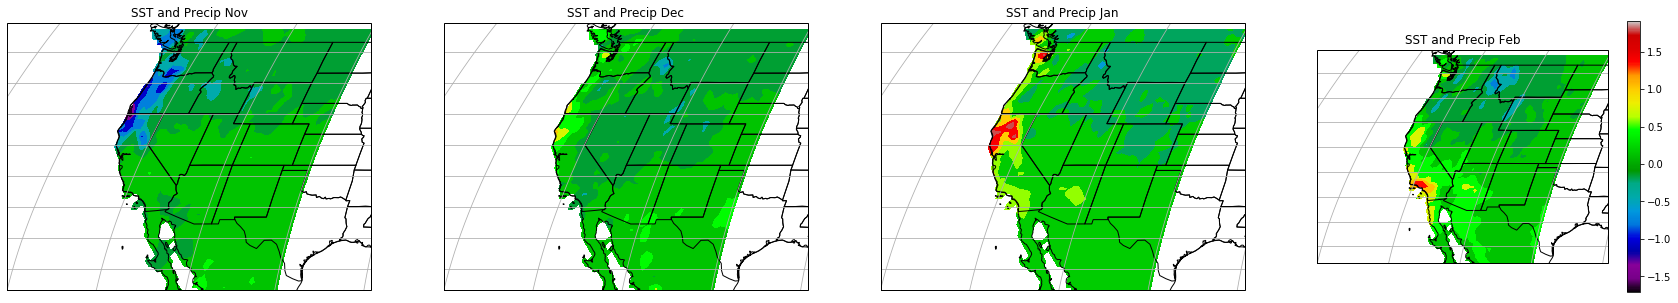

In [126]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim=min(minlist)
maxim=max(maxlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    plotmap(singleregression(rain,sst)[0],"SST and Precip "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto")
plt.imshow(singleregression(rain,sst)[0],vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()

Wind and Precipitation:

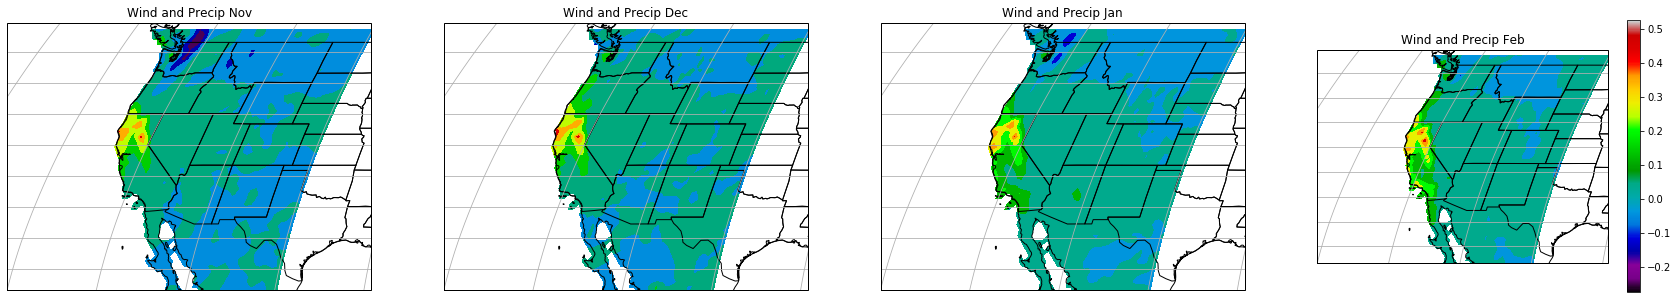

In [102]:
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim=np.min(Bpw)
maxim=np.max(Bpw)
for i,j in enumerate(axes.flat):
    #sst=getmonth(ninods,monthnum[i]).sst
    #rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    plotmap(Bpw[monthnum[i]-1],"Wind and Precip "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto")
plt.imshow(Bpw[i],vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()

Multivariable Regression: 

In [97]:
def multiregression(datadep,dataind1,dataind2,tshape=40,shape=(52,62)):
    cons=np.empty(shape)
    residual=np.empty(shape)
    coef1=np.empty(shape)
    coef2=np.empty(shape)
    if shape==(52,62):
        x,y=getlonlat("half")
    else:
         x,y=getlonlat("one")
    coef=np.empty(shape)
    a_array=np.ones((tshape,3))
    a_array[:,0]=dataind1
    a_array[:,1]=dataind2
    for i in range(shape[0]):
        for j in range(shape[1]):
            a_matrix=np.matmul(np.transpose(a_array),a_array)
            b_array=np.array(datadep.sel(Y=y[i],X=x[j]))
            B=np.matmul(np.transpose(a_array),b_array)
            X=np.linalg.solve(a_matrix,B) 
            yhat=np.matmul(a_array,X)
            residual[i,j]=np.nansum(np.square(b_array-yhat))
            coef1[i,j]=X[0]
            coef2[i,j]=X[1]
            cons[i,j]=X[2]
    return coef1,coef2,cons,residual,np.linalg.inv(a_matrix)  

We can look at sifnifigance using an F-test:

$$F=\frac{\frac{RSS_1-RSS_2}{p_2-p_1}}{\frac{RSS_2}{n-p_2}}$$

$RSS_2$ being the squared residual error of the 2 variable regression, and $RSS_1$ being that of the single variable expression. $p_2-p_1=1$ because there is only one difference in variable dimensions. ($n=40,p_2=2$)

This is essentially showing the amount of error when one uses just one of the variables to regress as opposed to both. 

We look at the F distribution to determine signifigance of this test, which would be a value of about 4 at $\alpha=.05$

In [98]:
def ftest(datadepen,dataindepfactoredout,dataind,tshape=40):
    bivar=multiregression(datadepen,dataindepfactoredout,dataind,tshape)[3]
    var=singleregression(datadepen,dataindepfactoredout,tshape)[2]
    f=np.divide((var-bivar),bivar)*38
    return f

In [101]:
np.nanmax(ftest(precipanom.rain,ninods.sst,windanom.ugrdprs,480))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


27.470701222829646

In [100]:
np.nanmin(ftest(precipanom.rain,ninods.sst,windanom.ugrdprs,480))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


1.2236679905781877e-10

In [121]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(ftest(rain,sst,windds)))
    maxlist.append(np.nanmax(ftest(rain,sst,windds)))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  

84.85616984015044

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  

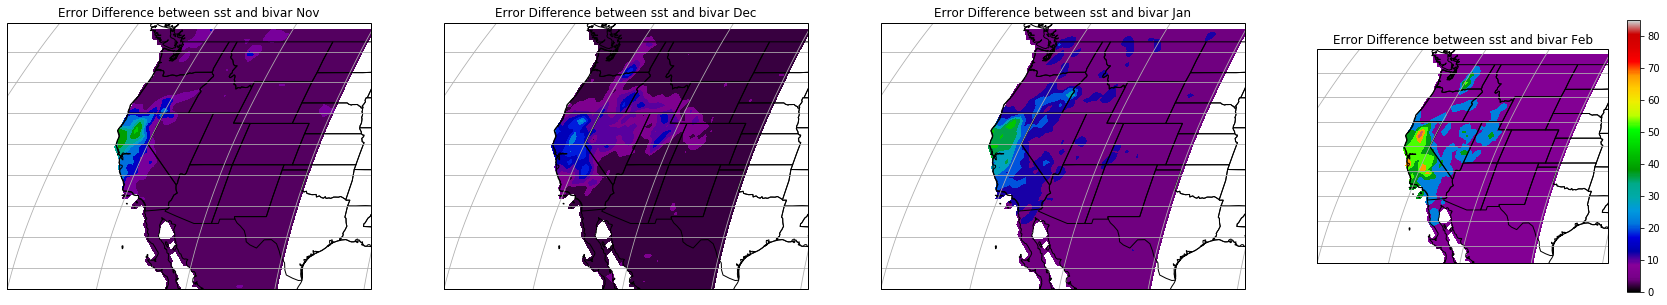

In [123]:

month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
maxim=max(maxlist)
minim=min(minlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(ftest(rain,sst,windds),"Error Difference between sst and bivar "+month[i],minim,maxim,"half",ax=j,colorbar="nonauto")
plt.imshow(ftest(rain,sst,windds),vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()



In [109]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(ftest(rain,windds,sst)))
    maxlist.append(np.nanmax(ftest(rain,windds,sst)))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  

18.63257053865402

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  

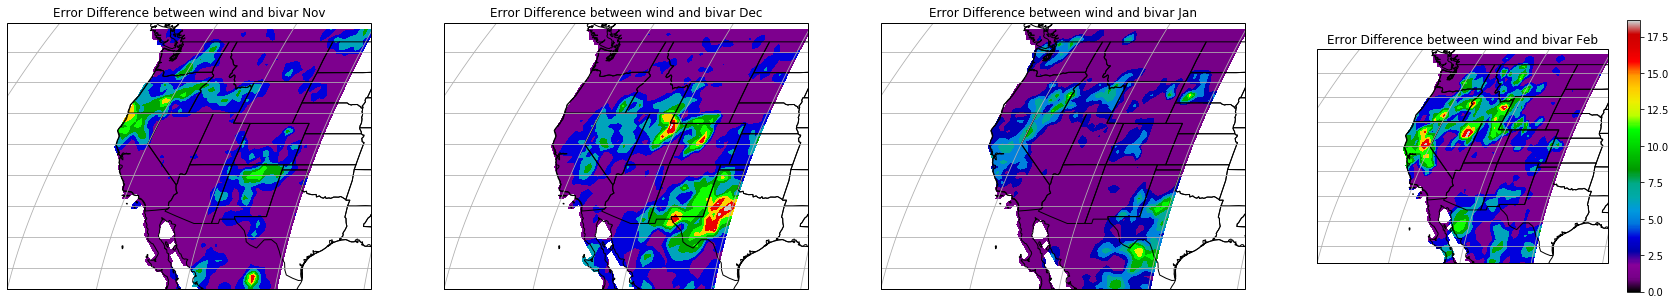

In [110]:

month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
maxim=max(maxlist)
minim=min(minlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(ftest(rain,windds,sst),"Error Difference between wind and bivar "+month[i],maxim,minim,"half",ax=j,colorbar="nonauto")
plt.imshow(ftest(rain,windds,sst),vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()

Partial Correlation: 

Partial correlation regresses out one of the variables in a bivariate regression so that one can see how two variables are correlated with the association from the third variable removed.

The equation is as follows: 

$$
\rho_{xy|z }=\frac{N\sum_{n=1}^{N}{e_{x,i}e_{y,i}}}
{\sqrt{N\sum_{n=1}^{N}{e_{x,i}^2}}\sqrt{N\sum_{n=1}^{N}{e_{y,i}^2}}}
$$

Where z is the independent variable in regression and x/y are two dependent variables. 

For our purposes, z will either be sst or wind, while x and y will be precipitation and either sst or wind. This will allow us to see for example the correlation between sst and precipitation with the effects of wind taken away. 

In [128]:
def regress(a,b):
    A=np.matmul(np.transpose(a),a)
    B=np.matmul(np.transpose(a),b)
    return np.linalg.solve(A,B)

def partialcorr(dependent,independent,precip,month,shape,tshape):
    error1=np.empty((shape[0],shape[1],tshape))
    b2=dependent
    a=np.ones((tshape,2))
    a[:,0]=np.array(independent)
    if shape==(52,62):
        lats = np.linspace(24.75,50.25, 52)
        lons= np.linspace(-130.25,-99.75,62)
        (x,y)=(lons,lats)
    else:
         x,y=getlonlat("one")
    for i in range(shape[1]):
        for j in range(shape[0]):
            b_array1=np.array(precip.sel(Y=y[j],X=x[i]))
            x1=regress(a,b_array1)
            error1[j,i,:]=np.square(b_array1-np.matmul(a,x1))
    b_array2=np.ones((tshape))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
        b_array2=b2
    x2=regress(a,b_array2)
    error2=np.square(b_array2-np.matmul(a,x2))
    pc=np.empty(shape)
    for i in range(shape[1]):
        for j in range(shape[0]):
            pc[j,i]=np.corrcoef(error1[j,i,:],error2)[0,1]
    return pc
        
        


In [173]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(partialcorr(windds,sst,rain,"half",(52,62),40)))
    maxlist.append(np.nanmax(partialcorr(windds,sst,rain,"half",(52,62),40)))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


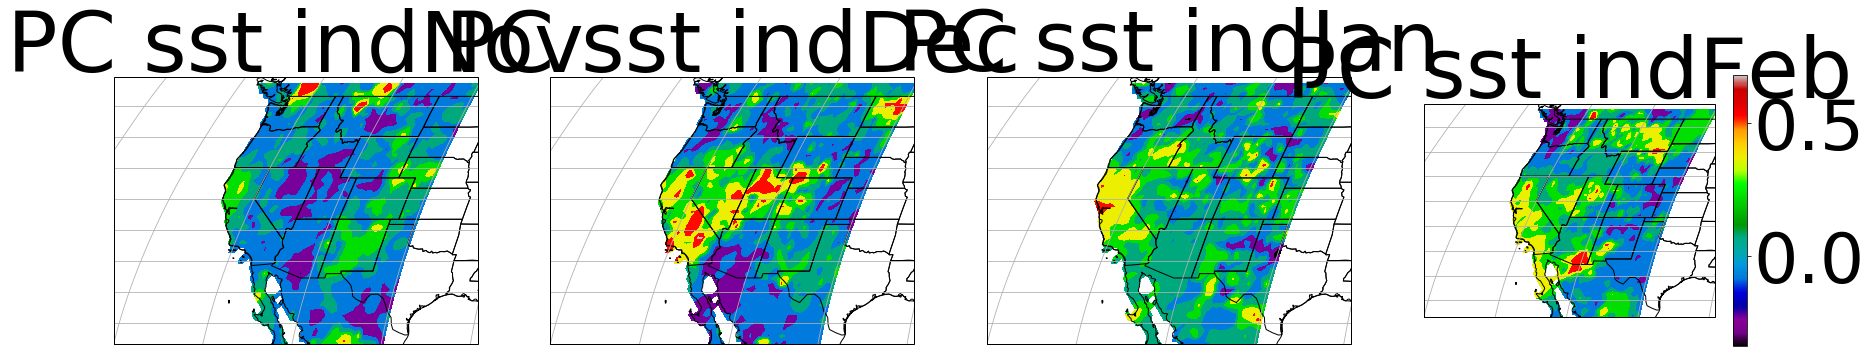

In [174]:

month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim_sind=min(minlist)
maxim_sind=max(maxlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(partialcorr(windds,sst,rain,"half",(52,62),40),"PC sst ind"+month[i],minim,maxim,"half",ax=j,colorbar="nonauto")
plt.imshow(partialcorr(windds,sst,rain,"half",(52,62),40),vmin=minim,vmax=maxim,cmap='nipy_spectral')
plt.colorbar()
plt.show()

In [134]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(ninods,i).sst
    rain=getmonth(precipds,i).rain-getmonth(precipds,i).rain.mean("T")
    windds=getmonth(wind,i).ugrdprs-getmonth(wind,i).ugrdprs.mean("T")
    minlist.append(np.nanmin(partialcorr(sst,windds,rain,"half",(52,62),40)))
    maxlist.append(np.nanmax(partialcorr(sst,windds,rain,"half",(52,62),40)))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


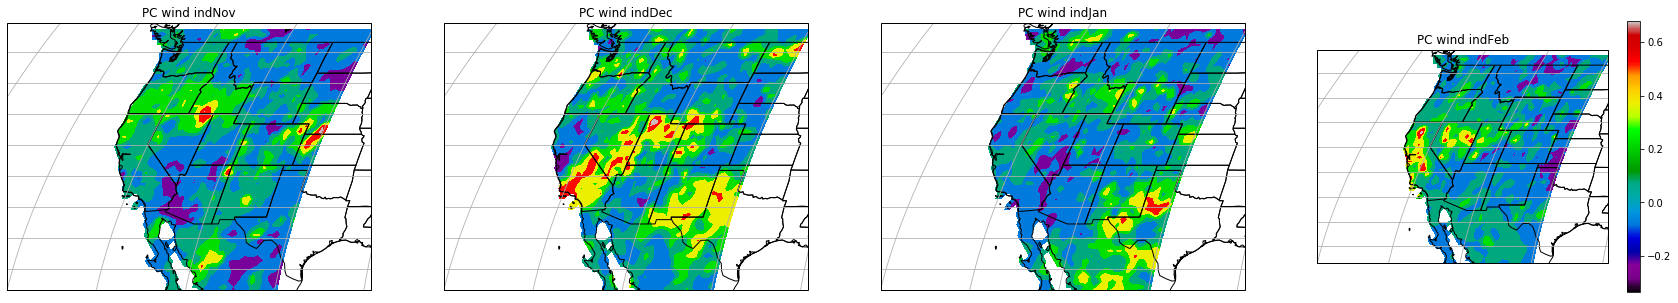

In [136]:

month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, axes = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim_pcwi=min(minlist)
maxim_pcwi=max(maxlist)
for i,j in enumerate(axes.flat):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    plotmap(partialcorr(sst,windds,rain,"half",(52,62),40),"PC wind ind"+month[i],minim_pcwi,maxim_pcwi,"half",ax=j,colorbar="nonauto")
plt.imshow(partialcorr(sst,windds,rain,"half",(52,62),40),vmin=minim_pcwi,vmax=maxim_pcwi,cmap='nipy_spectral')
plt.colorbar()
plt.show()


/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

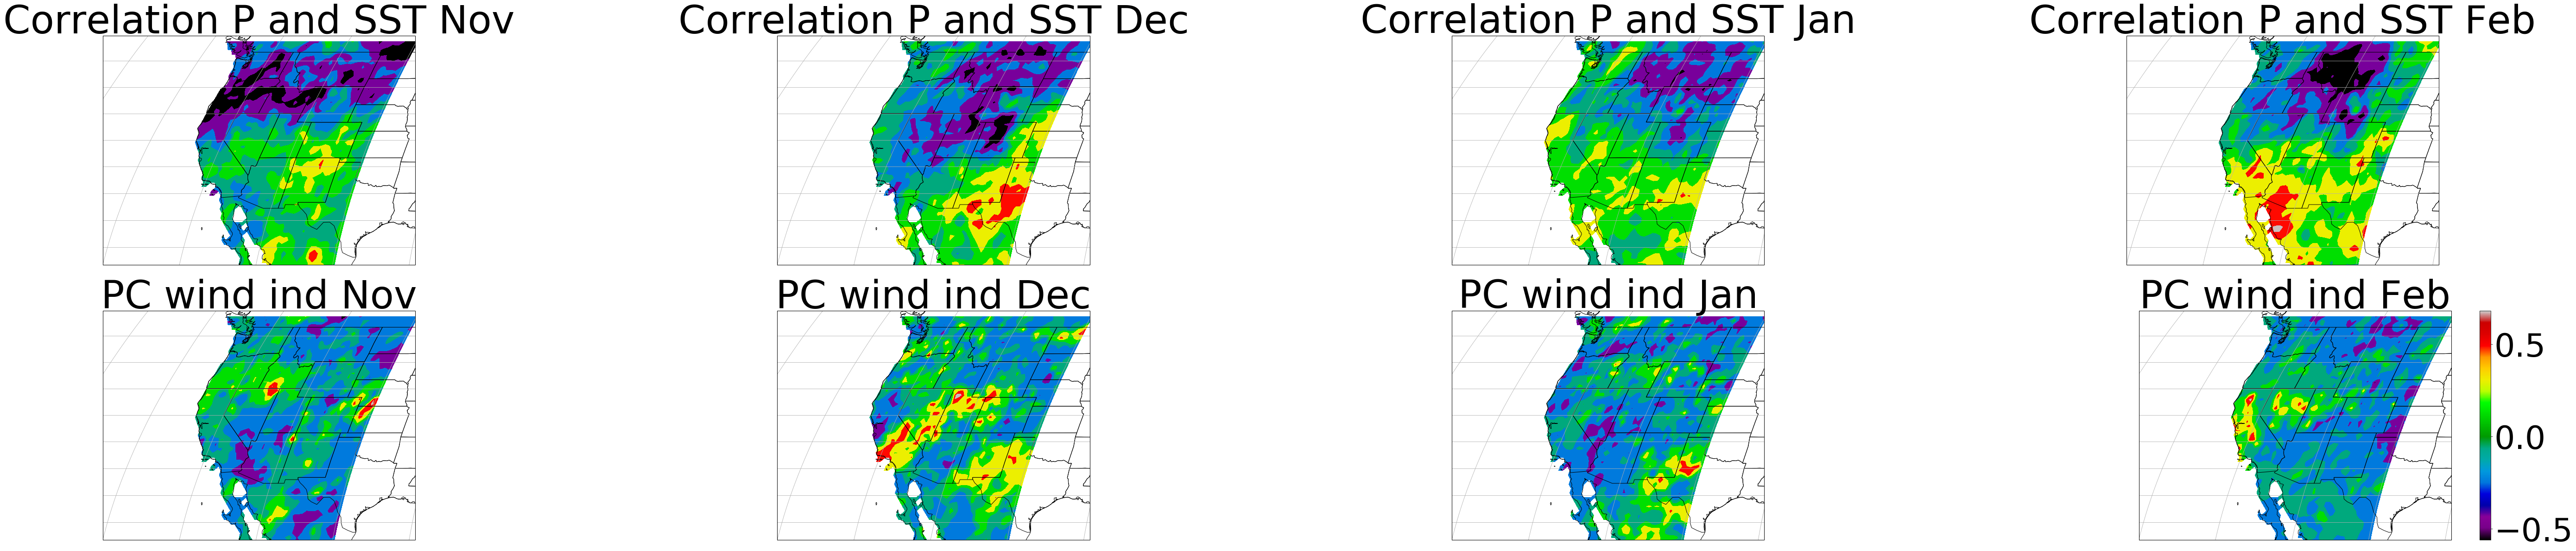

In [190]:

#month=["Nov","Dec","Jan","Feb"]
#monthnum=[10,11,0,1]
#fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
#minim_cpn=np.min(Cpn)
#maxim_cpn=np.max(Cpn)
#for i,j in enumerate([ax1,ax2,ax3,ax4]):
  #  plotmap(Cpn[monthnum[i]],"Correlation of SST and Precip "+month[i],minim_cpn,maxim_cpn,"half",ax=j,colorbar="nonauto")
#plt.imshow(Cpn[i],vmin=minim_cpn,vmax=maxim_cpn,cmap='nipy_spectral')
#plt.colorbar()
#plt.show()



font = { 'family' : 'normal',
         'size'   : 70 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual1=min(minim_cpn,minim_pcwi)
maxim_dual1=max(maxim_cpn,maxim_pcwi)
title_data=["Correlation P and SST ","PC wind ind "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    datas=[Cpn[monthnum[i]-1],partialcorr(sst,windds,rain,"half",(52,62),40)]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual1,maxim_dual1,resolution="half",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual1,maxim_dual1,resolution="half",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual1,vmax=maxim_dual1,cmap='nipy_spectral')
plt.colorbar()
plt.show()

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype

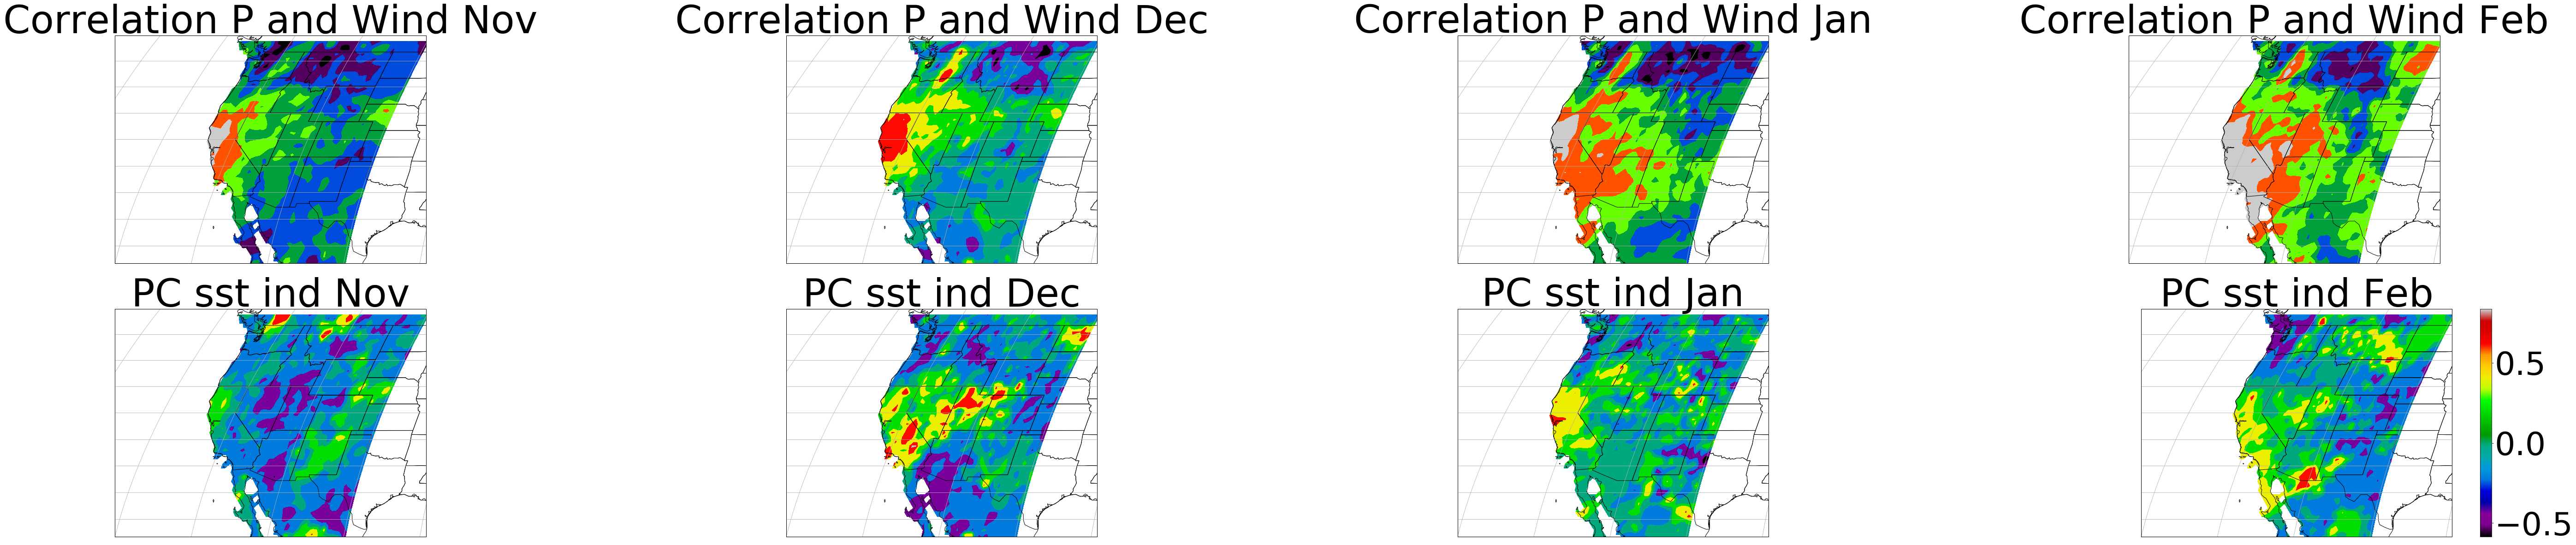

In [189]:
font = { 'family' : 'normal',
         'size'   : 70 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual2=min(minim_cpw,minim_sind)
maxim_dual2=max(maxim_cpw,maxim_sind)
title_data=["Correlation P and Wind ","PC sst ind "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    sst=getmonth(ninods,monthnum[i]).sst
    rain=getmonth(precipds,monthnum[i]).rain-getmonth(precipds,monthnum[i]).rain.mean("T")
    windds=getmonth(wind,monthnum[i]).ugrdprs-getmonth(wind,monthnum[i]).ugrdprs.mean("T")
    datas=[Cpw[monthnum[i]-1],partialcorr(windds,sst,rain,"half",(52,62),40)]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual2,maxim_dual2,resolution="half",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual2,maxim_dual2,resolution="half",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual2,vmax=maxim_dual2,cmap='nipy_spectral')
plt.colorbar()
plt.show()

Time Dependence: 

Next we used a lattitude/longitude mask of California in order to temporally analyze trends in California, we also looked at the south west as well as the Pacific NW. With the following longitude and lattitude ranges.

PNW:124-116W 41-48


SW: 113W-103W 32-38

In [ ]:
def percentilefun(data):
    data=np.array(data)
    final=np.empty(np.shape(data))
    for i,j in enumerate(data):
        final[i]=scipy.stats.percentileofscore(data, j, kind='rank')
    return final 

In [ ]:
mask=xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/(Jan%201979)/(Dec%202018)/RANGE/X/(130W)/(100W)/RANGE/Y/25/50/RANGE/SOURCES/.Features/.Political/.World/.firstOrder_ESRI/.the_geom/objectid/2297/VALUE/rasterize/dods')
mask=mask.drop("objectid")

In [ ]:
maskedprecip=precipds.where(mask.the_geom!=0).rain.mean(dim=["X","Y"])
maskedprecip

Divide up the data by month and produce scatter plots showing precipiation as functions of wind and sst: 

In [ ]:
novp=getmonth(maskedprecip,11) 
decp=getmonth(maskedprecip,12)
janp=getmonth(maskedprecip,1)
febp=getmonth(maskedprecip,2)
winterp=xr.concat([novp,decp,janp,febp],dim="T")
novw=getmonth(wind,11)
decw=getmonth(wind,12)
janw=getmonth(wind,1)
febw=getmonth(wind,2)
winterw=xr.concat([novw,decw,janw,febw],dim="T")
novsst=getmonth(ninods,11)
decsst=getmonth(ninods,12)
jansst=getmonth(ninods,1)
febsst=getmonth(ninods,2)
wintersst=xr.concat([novsst,decsst,jansst,febsst],dim="T")

In [ ]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
preciplist=[novp,decp,janp,febp]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
for i in range(4):
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(30,5))
    ax1.scatter(preciplist[i],windlist[i].ugrdprs)
    ax2.scatter(preciplist[i],sstlist[i].sst)
    ax1.set_title(month[i]+' Wind and Precip')
    ax1.set_xlabel('Wind')
    ax1.set_ylabel('Precip')
    ax2.set_title(month[i]+' SST and Precip')
    ax2.set_xlabel('SST')
    ax2.set_ylabel('Precip')

Bin the data into percentiles in order to produce boxplots (again with precip as the dependent variable)

In [ ]:
def percentilebin(data,bins=5):
    bino=np.empty((np.shape(data)))
    percentile=np.empty((bins))
    for i,j in enumerate(np.linspace(0,1,bins)):
        percentile[i]=np.quantile(data,j)
        percentile=list(percentile)
    for j,i in enumerate(np.array(data)):
        index=percentile.index(min(percentile, key=lambda x:abs(x-i)))
        bino[j]=np.linspace(0,1,bins)[index]
    return bino

In [ ]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
import scipy.stats
raindf=pd.DataFrame({"rain":np.reshape(percentilebin(winterp),(160,)),"sst":percentilefun(wintersst.sst),"wind":percentilefun(winterw.ugrdprs)})

rrst=pd.DataFrame({"rain":np.reshape(percentilefun(winterp),(160,)),"sst":percentilebin(wintersst.sst)})
rw=pd.DataFrame({"rain":np.reshape(percentilefun(winterp),(160,)),"wind":percentilebin(winterw.ugrdprs)})
boxplot = raindf.boxplot(by='rain')

In [ ]:
boxplot=rrst.boxplot(by='sst')
boxplot=rw.boxplot(by='wind')

Heat map (all 3 variables represented as percentiles)

In [ ]:
dsbin=pd.DataFrame({"rain":np.reshape(percentilebin(winterp,10),(160,)),"sst":percentilebin(wintersst.sst,10),"wind":percentilebin(winterw.ugrdprs,20)})
import seaborn as sns
import pandas as pd

dsbin.drop_duplicates(['sst','wind'], inplace=True)
pivot = dsbin.pivot(index='sst', columns='wind', values='rain')
ax = sns.heatmap(pivot)
ax.invert_yaxis()
plt.show()

Examining the PNW and SW: 

In [ ]:
precipurlnw="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%281240W%29/%28116W%29/RANGE/Y/41/48/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
precipurlsw="http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/.CPC/.UNIFIED_PRCP/.GAUGE_BASED/.GLOBAL/.v1p0/.extREALTIME/.rain/T/monthlyAverage/T/%28Jan%201979%29/%28Dec%202018%29/RANGE/X/%28113W%29/%28103W%29/RANGE/Y/32/38/RANGE/T/(days%20since%201960-01-01)streamgridunitconvert/dods"
pacificnw=xr.open_dataset("/Users/brigidlynch/Downloads/precipnw.nc")
southwest= xr.open_dataset("/Users/brigidlynch/Downloads/precipsw.nc")
pacificnw=pacificnw.rain.mean(dim=["X","Y"])
southwest=southwest.rain.mean(dim=["X","Y"])

In [ ]:
novpsw=getmonth(southwest,11) 
decpsw=getmonth(southwest,12)
janpsw=getmonth(southwest,1)
febpsw=getmonth(southwest,2)
novpnw=getmonth(pacificnw,11) 
decpnw=getmonth(pacificnw,12)
janpnw=getmonth(pacificnw,1)
febpnw=getmonth(pacificnw,2)
winterpsw=xr.concat([novpsw,decpsw,janpsw,febpsw],dim="T")
winterpnw=xr.concat([novpnw,decpnw,janpnw,febpnw],dim="T")

SW scatter plots: 

In [ ]:
month=["Nov","Dec","Jan","Feb"]
preciplistsw=[novpsw,decpsw,janpsw,febpsw]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
for i in range(4):
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(30,5))
    ax1.scatter(percentilefun(preciplist[i]),percentilefun(windlist[i].ugrdprs))
    ax2.scatter(percentilefun(preciplist[i]),percentilefun(sstlist[i].sst))
    ax1.set_title(month[i]+' Wind and SW Precip')
    ax1.set_xlabel('Wind')
    ax1.set_ylabel('Nino')
    ax2.set_title(month[i]+' SST and  SW Precip')
    ax2.set_xlabel('SST')
    ax2.set_ylabel('Precip')

NW scatter plots

In [ ]:
month=["Nov","Dec","Jan","Feb"]
preciplistnw=[novpnw,decpnw,janpnw,febpnw]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
for i in range(4):
    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(30,5))
    ax1.scatter(percentilefun(preciplistnw[i]),percentilefun(windlist[i].ugrdprs))
    ax2.scatter(percentilefun(preciplistnw[i]),percentilefun(sstlist[i].sst))
    ax1.set_title(month[i]+' Wind and NW Precip')
    ax1.set_xlabel('Wind')
    ax1.set_ylabel('Precip')
    ax2.set_title(month[i]+' SST and NW Precip')
    ax2.set_xlabel('SST')
    ax2.set_ylabel('Precip')

NW boxplplots

In [ ]:
raindfnw=pd.DataFrame({"rain":np.reshape(percentilebin(winterpnw),(160,)),"sst":percentilefun(wintersst.sst),"wind":percentilefun(winterw.ugrdprs)})
raindfsw=pd.DataFrame({"rain":np.reshape(percentilebin(winterpsw),(160,)),"sst":percentilefun(wintersst.sst),"wind":percentilefun(winterw.ugrdprs)})

rrstnw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpnw),(160,)),"sst":percentilebin(wintersst.sst)})
rwnw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpnw),(160,)),"wind":percentilebin(winterw.ugrdprs)})
rrstsw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpsw),(160,)),"sst":percentilebin(wintersst.sst)})
rwsw=pd.DataFrame({"rain":np.reshape(percentilefun(winterpsw),(160,)),"wind":percentilebin(winterw.ugrdprs)})
boxplot = raindfnw.boxplot(by='rain')

In [ ]:
boxplot=rrstnw.boxplot(by='sst')
boxplot=rwnw.boxplot(by='wind')

SW boxplots

In [ ]:
boxplot = raindfsw.boxplot(by='rain')

In [ ]:
boxplot=rrstsw.boxplot(by='sst')
boxplot=rwsw.boxplot(by='wind')

Comparing rain levels over time in the three locations:

In [ ]:
preciplistsw=[novpsw,decpsw,janpsw,febpsw]
preciplistnw=[novpnw,decpnw,janpnw,febpsw]
preciplist=[novp,decp,janp,febp]
windlist=[novw,decw,janw,febw]
sstlist=[novsst,decsst,jansst,febsst]
month=["Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(30,5))
axes=[ax1,ax2,ax3,ax4]
for i,j in enumerate(monthnum):
    axes[i].plot(preciplist[i],color="red")
    axes[i].plot(preciplistsw[i],color="green")
    axes[i].plot(preciplistnw[i],color="blue")

Comparing Coefficients of variations ofr the three locations: 

In [ ]:

def cv(data):
    return data.std()/data.mean()

In [ ]:
nwcv=np.array([cv(novpnw),cv(decpnw),cv(janpnw),cv(febpnw)])
swcv=np.array([cv(novpsw),cv(decpsw),cv(janpsw),cv(febpsw)])
ccv=np.array([cv(novp),cv(decp),cv(janp),cv(febp)])
cv(novpsw)
cv(novp)
plt.plot(nwcv,color="blue")
plt.plot(swcv,color="red")
plt.plot(ccv,color="green")

Forecast Data: Next we took a look at two different hindcast models in order to get additional data for our analysis

EMC:
ESRL FIDRM: 

In [192]:
def openlink(typeof):
    if typeof=="EMC":
        precipforcasturl = "http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.pr/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/-130.25/-99.75/RANGE/Y/24.75/50.25/RANGE/dods "
        sstforecasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.ts/L/2.5/31.5/RANGEEDGES/%5BL%5Daverage/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/dods "
        windforcasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.EMC/.GEFS/.hindcast/.ua/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/dods"
    else:
        precipforcasturl = "http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.pr/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/-130.25/-99.75/RANGE/Y/24.75/50.25/RANGE/dods "
        sstforecasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.ts/L/2.5/31.5/RANGEEDGES/%5BL%5Daverage/Y/-5/5/RANGEEDGES/X/190/240/RANGEEDGES/dods "
        windforcasturl="http://iridl.ldeo.columbia.edu/SOURCES/.Models/.SubX/.ESRL/.FIMr1p1/.hindcast/.ua/L/2.5/31.5/RANGEEDGES/%5BL%5D/average/X/220/240/RANGE/Y/27/40/RANGE/[X/Y]average/dods"
    return(precipforcasturl,sstforecasturl,windforcasturl)

In [193]:
rainforcast=xr.open_dataset(openlink("EMC")[0], chunks={'S': 100})
sstforcast=xr.open_dataset(openlink("EMC")[1], chunks={'S': 100})




In [194]:
windforcast=xr.open_dataset(openlink("EMC")[2],chunks={"S":100})

In [195]:
rainforcast_emc=rainforcast.sel(M=[1.0,2.0,3.0,4.0])

In [196]:
windforcast_emc=windforcast.sel(P=200)



In [197]:
windforcast_emc

<xarray.Dataset>
Dimensions:  (M: 11, S: 939)
Coordinates:
    P        int32 200
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
Data variables:
    ua       (S, M) float64 dask.array<shape=(939, 11), chunksize=(100, 11)>
Attributes:
    Conventions:  IRIDL

In [198]:
sstforcast_emc=sstforcast.mean(["X","Y"])

In [199]:
windforcast_emc=windforcast_emc.sel(M=[1.0,2.0,3.0,4.0])
windforcast_emc

<xarray.Dataset>
Dimensions:  (M: 4, S: 939)
Coordinates:
    P        int32 200
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ua       (S, M) float64 dask.array<shape=(939, 4), chunksize=(100, 4)>
Attributes:
    Conventions:  IRIDL

In [203]:
sstforcast_emc=sstforcast_emc.sel(M=[1.0,2.0,3.0,4.0])
sstforcast_emc

<xarray.Dataset>
Dimensions:  (M: 4, S: 939)
Coordinates:
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2016-12-21 2016-12-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ts       (S, M) float64 dask.array<shape=(939, 4), chunksize=(100, 4)>

In [204]:
td = np.timedelta64(15,'D')
T=np.array(sstforcast_emc.coords["S"])+td
M=np.array(sstforcast_emc.coords["M"])

In [205]:
p_emc_array=np.array(rainforcast_emc.pr)

In [206]:
sst_emc_array=np.array(sstforcast_emc.ts)

In [ ]:
ua_emc=np.array(windforcast_emc.ua)

In [207]:
pforcast_emc_adjtime= xr.Dataset(data_vars={'pr':  (('T', 'M','Y','X'), p_emc_array)},coords={'T': np.array(rainforcast_emc.coords["S"])+td,'M': np.array(rainforcast_emc.coords["M"]),'Y':rainforcast_emc.coords["Y"],'X':rainforcast_emc.coords["X"]},)


In [208]:
wforcast_emc_adjtime= xr.Dataset(data_vars={'ua':  (('T', 'M'), windforcast_emc.ua)},coords={'T': np.array(windforcast_emc.coords["S"])+td,'M':np.array(windforcast_emc.coords["M"])},)


In [209]:
sstforcast_emc_adjtime= xr.Dataset(data_vars={'ts':  (('T', 'M'), sst_emc_array)},coords={'T': np.array(sstforcast_emc.coords["S"])+td,'M': np.array(sstforcast_emc.coords["M"])},)

In [210]:
sstforcast_emc_adjtime=sstforcast_emc_adjtime.sel(M=[1.0,2.0,3.0,4.0])

In [214]:
windanom_emcforecast

<xarray.Dataset>
Dimensions:  (M: 4, T: 939)
Coordinates:
  * M        (M) float32 1.0 2.0 3.0 4.0
  * T        (T) datetime64[ns] 1999-01-21 1999-01-28 ... 2017-01-05 2017-01-12
    month    (T) int64 1 1 2 2 2 2 3 3 3 3 4 ... 11 11 11 11 12 12 12 12 12 1 1
Data variables:
    *empty*

In [217]:
precipanom_emcforecast=pforcast_emc_adjtime.groupby("T.month")-pforcast_emc_adjtime.groupby("T.month").mean("T")

Spn_emc=(precipanom_emcforecast.pr*sstforcast_emc_adjtime.ts).groupby("T.month").mean(["T","M"])
Sn_emc = sstforcast_emc_adjtime.ts.groupby('T.month').std(['T',"M"])
Sp_emc = precipanom_emcforecast.pr.groupby('T.month').std(['T',"M"])
Cpn_emc = Spn_emc/Sn_emc/Sp_emc
windanom_emcforecast=wforcast_emc_adjtime.groupby("T.month")-wforcast_emc_adjtime.groupby("T.month").mean("T")
Swn_emc=(windanom_emcforecast.ua*sstforcast_emc_adjtime.ts).groupby("T.month").mean(["T","M"])
Sw_emc = windanom_emcforecast.ua.groupby('T.month').std(['T',"M"])
Cwn_emc=Swn_emc/Sn_emc/Sw_emc

Spw_emc=(windanom_emcforecast.ua*precipanom_emcforecast.pr).groupby("T.month").mean(["T","M"])
Cpw_emc=Spw_emc/Sw_emc/Sp_emc

In [222]:
Cpn[11]

<xarray.DataArray (Y: 28, X: 33)>
array([[-0.074083, -0.066374, -0.068086, ...,  0.363614,  0.362193,  0.378301],
       [-0.058193, -0.056328, -0.054336, ...,  0.294358,  0.330756,  0.308747],
       [-0.047364, -0.036359, -0.038005, ...,  0.309469,  0.326448,  0.316129],
       ...,
       [ 0.151358,  0.118934,  0.117973, ..., -0.122499, -0.086943, -0.061686],
       [ 0.130894,  0.128301,  0.093637, ..., -0.133672, -0.096791, -0.059023],
       [ 0.101693,  0.079173, -0.01213 , ..., -0.110441, -0.05479 , -0.042314]])
Coordinates:
  * Y        (Y) float32 24.0 25.0 26.0 27.0 28.0 ... 47.0 48.0 49.0 50.0 51.0
  * X        (X) float32 -131.0 -130.0 -129.0 -128.0 ... -101.0 -100.0 -99.0
    month    int64 12

In [232]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpn_emc[i]))
    maxlist.append(np.max(Cpn_emc[i]))

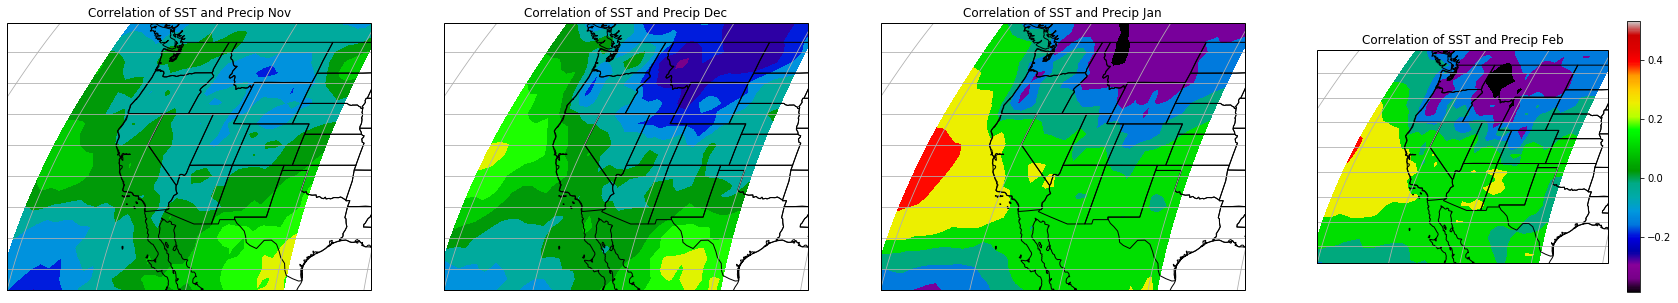

In [238]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim_cpn_emc=np.min(minlist)
maxim_cpn_emc=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpn_emc[monthnum[i]],"Correlation of SST and Precip "+month[i],minim_cpn,maxim_cpn,"one",ax=j,colorbar="nonauto")
plt.imshow(Cpn_emc[monthnum[i]],vmin=minim_cpn,vmax=maxim_cpn,cmap='nipy_spectral')
plt.colorbar()
plt.show()

In [247]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpw[i]))
    maxlist.append(np.max(Cpw[i]))

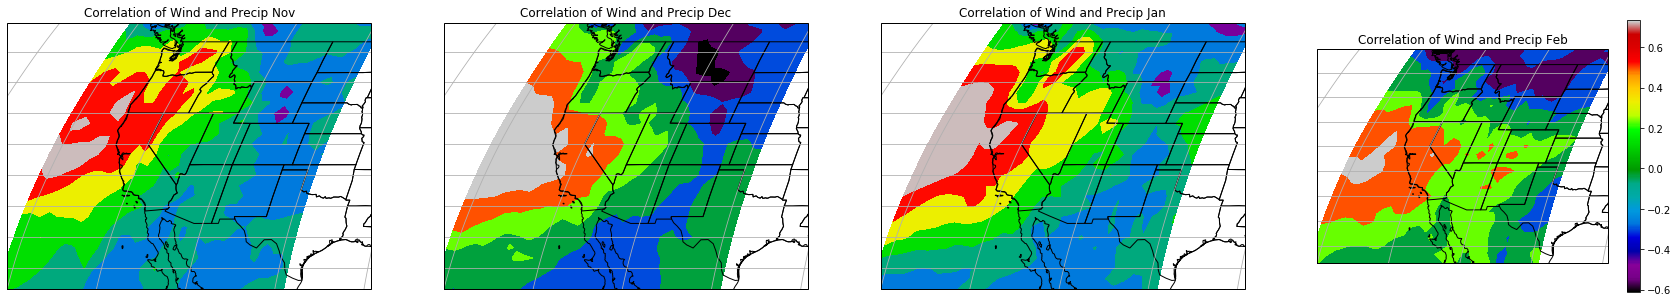

In [248]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb"]
monthnum=[10,11,0,1]
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(30,5))
minim_cpw_emc=np.min(minlist)
maxim_cpw_emc=np.max(maxlist)
for i,j in enumerate([ax1,ax2,ax3,ax4]):
    plotmap(Cpw_emc[monthnum[i]],"Correlation of Wind and Precip "+month[i],minim_cpw,maxim_cpw,"one",ax=j,colorbar="nonauto")
plt.imshow(Cpw_emc[monthnum[i]],vmin=minim_cpw,vmax=maxim_cpw,cmap='nipy_spectral')
plt.colorbar()
plt.show()


In [236]:
#A linear algebra regression function 
def regress(a,b):
    A=np.matmul(np.transpose(a),a)
    B=np.matmul(np.transpose(a),b)
    return np.linalg.solve(A,B)
    

    
#tshape is a multiplication of other variables (4 M variables* t, the resulting matrices will be 4t long)
#dependent is the b matrix 
#indenepent is one of the a matrices
#precipiation is our constant a matrix 
# this function computes two coefficients for ax=b and correlates their respectives squared errors 


def partialcorr(dependent,independent,precip,month,shape,tshape):
    error1=np.empty((shape[0],shape[1],tshape*4))
    b2=dependent
    a=np.ones((tshape*4,2))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
            a[k*tshape:(k+1)*tshape,0]=np.array(independent.sel(M=m))
    if shape==(52,62):
        x,y=getlonlat("half")
    else:
         x,y=getlonlat("one")
    for i in range(shape[1]):
        for j in range(shape[0]):
            b_array1=np.ones((tshape*4))
            for k,m in enumerate([1.0,2.0,3.0,4.0]):
                b_array1[k*tshape:(k+1)*tshape]=np.array(precip.sel(Y=y[j],X=x[i],M=m))
            x1=regress(a,b_array1) 
            error1[j,i,:]=np.square(b_array1-np.matmul(a,x1))
    b_array2=np.ones((tshape*4))
    for k,m in enumerate([1.0,2.0,3.0,4.0]):
        b_array2[k*tshape:(k+1)*tshape]=np.array(b2.sel(M=m))
    x2=regress(a,b_array2)
    error2=np.square(b_array2-np.matmul(a,x2))
    pc=np.empty(shape)
    for i in range(shape[1]):
        for j in range(shape[0]):
            pc[j,i]=np.corrcoef(error1[j,i,:],error2)[0,1]
    return pc
        
        


In [91]:
wind_nov=np.array(windforcast_emc.sel(S=windforcast_emc["S.month"]==11).ua)
sst_nov=np.array(sstforcast_emc.sel(S=sstforcast_emc["S.month"]==11).ts)
pmonth=pforcast_emc_adjtime.sel(T=pforcast_emc_adjtime["T.month"]==11)
p_nov=pmonth - pmonth.mean('T')

**MISSING WIND VALUES**

In [92]:
wind_nov

array([[        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [21.04151965, 25.84047668, 22.3279936 , 17.86212048],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan],
       [21.56962622, 33.82390084, 21.47403666, 18.87627012],
       [32.01364001, 29.5234359 , 30.86577153, 27.70319774],
       [26.69357189, 15.4689232 , 28.89574885, 21.4876308 ],
       [26.23416147, 33.

In [244]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_emc_adjtime,i).ts
    rain=getmonth(pforcast_emc_adjtime,i).pr-getmonth(pforcast_emc_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_emc_adjtime,i).ua-getmonth(wforcast_emc_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/

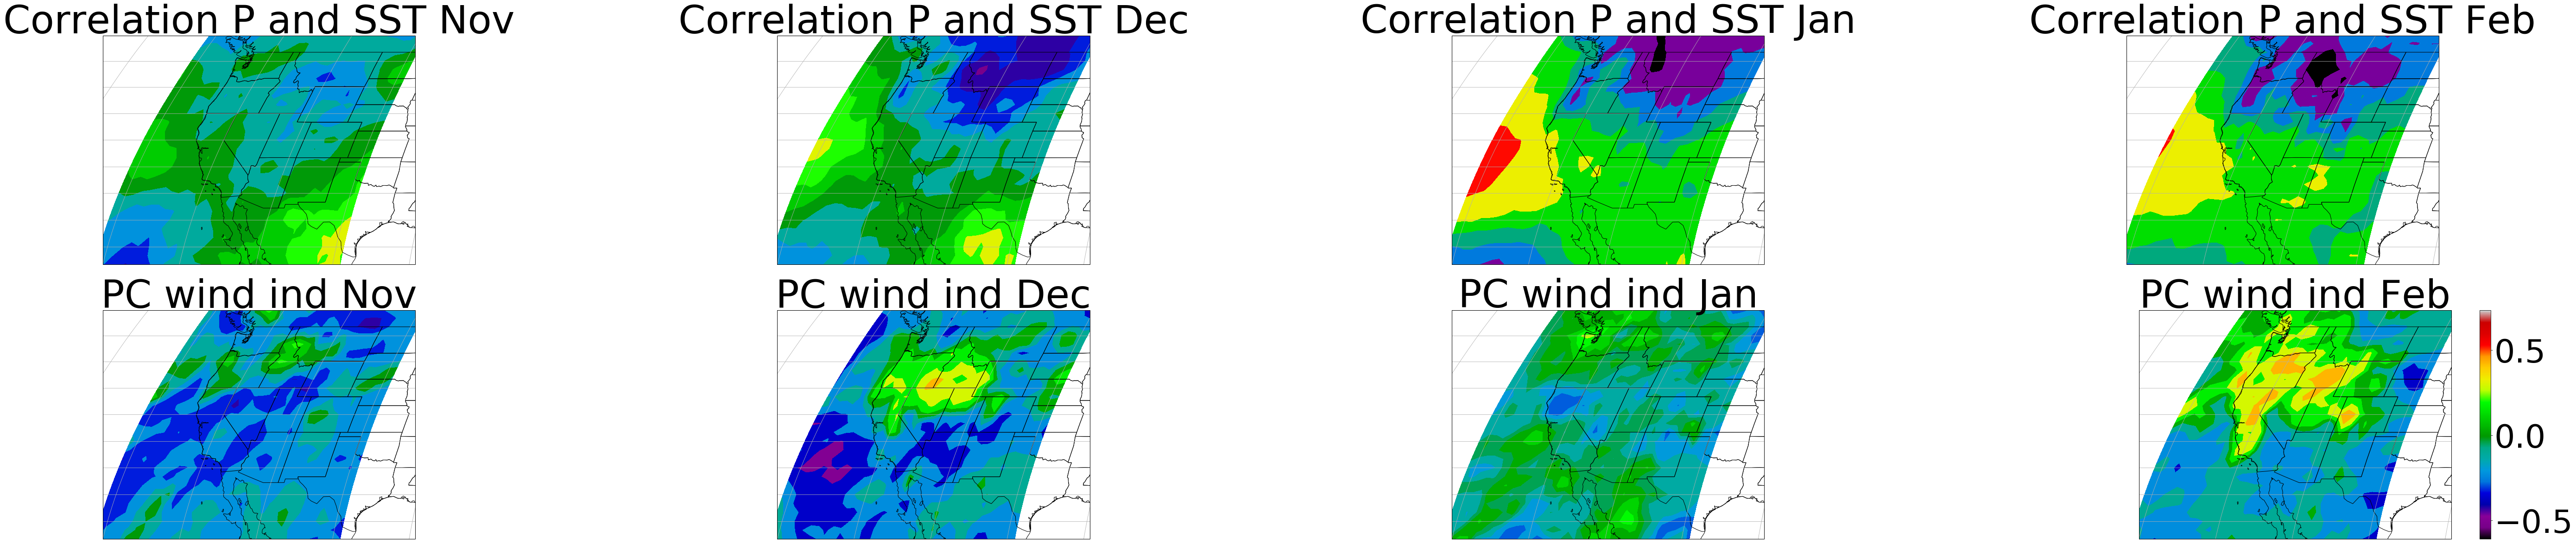

In [245]:
font = { 'family' : 'normal',
         'size'   : 70 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual1_emc=min(minim_cpn_emc,min(minlist))
maxim_dual1_emc=max(maxim_cpn_emc,max(maxlist))
title_data=["Correlation P and SST ","PC wind ind "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_emc_adjtime.sel(T=pforcast_emc_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_emc_adjtime.sel(T=wforcast_emc_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_emc_adjtime.sel(T=sstforcast_emc_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpn[monthnum[i]-1],partialcorr(sstmonth,windanom,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual1_emc,maxim_dual1_emc,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual1_emc,maxim_dual1_emc,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual1_emc,vmax=maxim_dual1_emc,cmap='nipy_spectral')
plt.colorbar()
plt.show()

In [94]:
sstforcast_emc_adjtime

<xarray.Dataset>
Dimensions:  (M: 4, T: 939)
Coordinates:
  * T        (T) datetime64[ns] 1999-01-21 1999-01-28 ... 2017-01-05 2017-01-12
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ts       (T, M) float64 297.9 297.9 297.9 297.9 ... 299.5 299.5 299.5 299.5

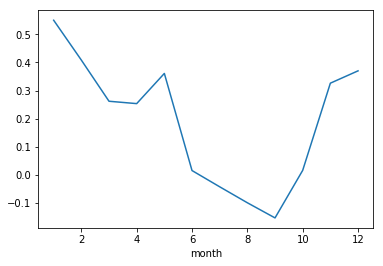

In [95]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
windanom=wforcast_emc_adjtime.groupby("T.month")-wforcast_emc_adjtime.groupby("T.month").mean("T")
sstanom=sstforcast_emc_adjtime.groupby("T.month")-sstforcast_emc_adjtime.groupby("T.month").mean("T")
Swn=(windanom.ua*sstanom.ts).groupby("T.month").mean(["T","M"])
Sw = windanom.ua.groupby('T.month').std(['T','M'])
Sn = sstanom.ts.groupby('T.month').std(['T',"M"])
Cwn=Swn/Sn/Sw

Cwn.plot()

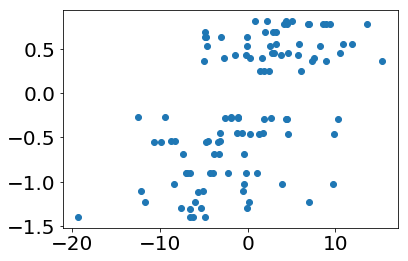

In [96]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
wmonth=wforcast_emc_adjtime.sel(T=wforcast_emc_adjtime["T.month"]==2).ua
sstmonth=sstforcast_emc_adjtime.sel(T=sstforcast_emc_adjtime["T.month"]==2)
sstmonth=sstmonth-sstmonth.mean("T")
sstmonth=sstmonth.ts
windanom=wmonth-wmonth.mean("T")
sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
windanom=windanom[~np.isnan(windanom).any(axis=1)]
plt.scatter(windanom,sstmonth)


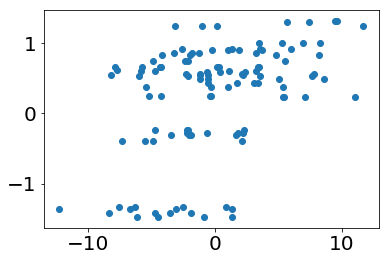

In [97]:
wmonth=wforcast_emc_adjtime.sel(T=wforcast_emc_adjtime["T.month"]==11).ua
sstmonth=sstforcast_emc_adjtime.sel(T=sstforcast_emc_adjtime["T.month"]==11)
sstmonth=sstmonth-sstmonth.mean("T")
sstmonth=sstmonth.ts
windanom=wmonth-wmonth.mean("T")
sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
windanom=windanom[~np.isnan(windanom).any(axis=1)]
plt.scatter(windanom,sstmonth)

In [249]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_emc_adjtime,i).ts
    rain=getmonth(pforcast_emc_adjtime,i).pr-getmonth(pforcast_emc_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_emc_adjtime,i).ua-getmonth(wforcast_emc_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: All-NaN slice encountered
  if __name__ == '__main__':
/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: All-NaN slice encountered
  
/Users/brigidlynch/anaconda3/lib/

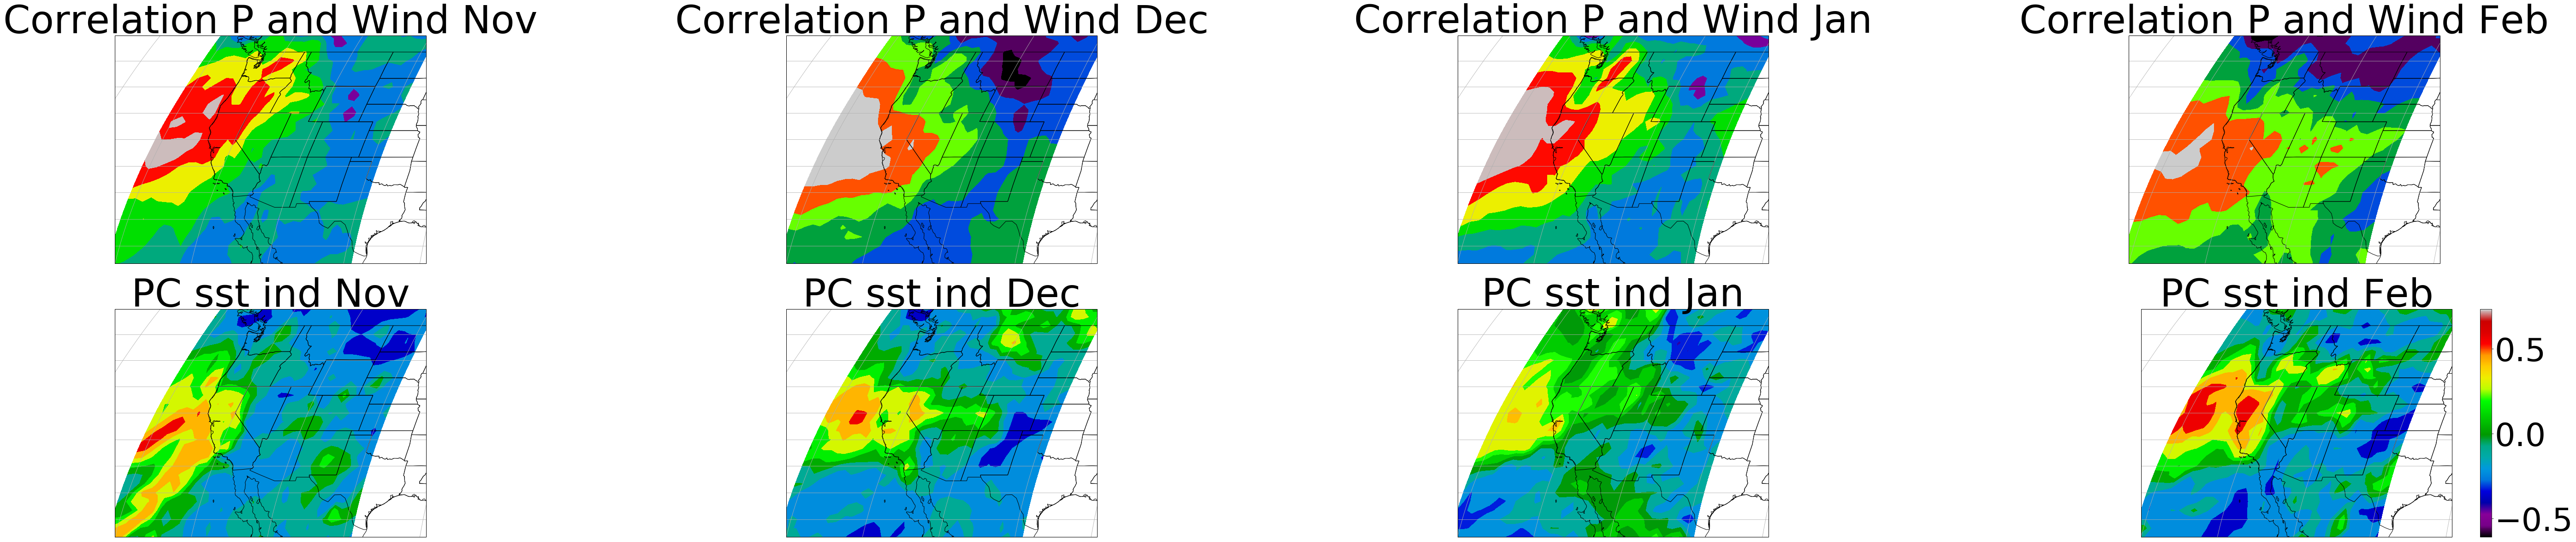

In [250]:
font = { 'family' : 'normal',
         'size'   : 70 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual2_emc=min(minim_cpw_emc,min(minlist))
maxim_dual2_emc=max(maxim_cpw_emc,max(maxlist))
title_data=["Correlation P and Wind ","PC sst ind "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_emc_adjtime.sel(T=pforcast_emc_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_emc_adjtime.sel(T=wforcast_emc_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_emc_adjtime.sel(T=sstforcast_emc_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpw[monthnum[i]-1],partialcorr(windanom,sstmonth,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual2_emc,maxim_dual2_emc,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual2_emc,maxim_dual2_emc,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual2_emc,vmax=maxim_dual2_emc,cmap='nipy_spectral')
plt.colorbar()
plt.show()

In [251]:
rainforcast=xr.open_dataset(openlink("other")[0], chunks={'S': 100})
sstforcast=xr.open_dataset(openlink("other")[1], chunks={'S': 100})
windforcast=xr.open_dataset(openlink("other")[2],chunks={"S":100})

In [252]:
windforcast=windforcast.sel(P=200)

In [253]:
windforcast

<xarray.Dataset>
Dimensions:  (M: 4, S: 965)
Coordinates:
    P        int32 200
  * S        (S) datetime64[ns] 1999-01-06 1999-01-13 ... 2017-06-21 2017-06-28
  * M        (M) float32 1.0 2.0 3.0 4.0
Data variables:
    ua       (S, M) float64 dask.array<shape=(965, 4), chunksize=(100, 4)>
Attributes:
    Conventions:  IRIDL

In [254]:
sstforcast=sstforcast.mean(["X","Y"])

In [255]:
td = np.timedelta64(15,'D')

In [256]:
T=np.array(sstforcast.coords["S"])+td

In [257]:
M=np.array(sstforcast.coords["M"])


In [258]:
pforcast_adjtime= xr.Dataset(data_vars={'pr':    (('T', 'M','Y','X'), rainforcast.pr)},coords={'T': T,'M': M,'Y':rainforcast.coords["Y"],'X':rainforcast.coords["X"]},)

In [259]:
wforcast_adjtime= xr.Dataset(data_vars={'ua':  (('T', 'M'), windforcast.ua)},coords={'T': T,'M':M},)
sstforcast_adjtime= xr.Dataset(data_vars={'ts':  (('T', 'M'), sstforcast.ts)},coords={'T': T,'M': M},)

In [269]:
precipanom_forecast=pforcast_adjtime.groupby("T.month")-pforcast_adjtime.groupby("T.month").mean("T")
sstanom_forecast=sstforcast_adjtime.groupby("T.month")-sstforcast_adjtime.groupby("T.month").mean("T")
Spn_for=(precipanom_forecast.pr*sstanom_forecast.ts).groupby("T.month").mean(["T","M"])
Sn_for = sstanom_forecast.ts.groupby('T.month').std(['T',"M"])
Sp_for = precipanom_forecast.pr.groupby('T.month').std(['T',"M"])
Cpn_for = Spn_for/Sn_for/Sp_for
windanom_forecast=wforcast_adjtime.groupby("T.month")-wforcast_adjtime.groupby("T.month").mean("T")
Swn_for=(windanom_forecast.ua*sstforcast_adjtime.ts).groupby("T.month").mean(["T","M"])
Sw_for = windanom_forecast.ua.groupby('T.month').std(['T',"M"])
Cwn_for=Swn_for/Sn_for/Sw_for

Spw_for=(windanom_forecast.ua*precipanom_forecast.pr).groupby("T.month").mean(["T","M"])
Cpw_for=Spw_for/Sw_for/Sp_for

In [270]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpn_for[i]))
    maxlist.append(np.max(Cpn_for[i]))
minim_cpn_for=min(minlist)
maxim_cpn_for=max(maxlist)
print(minim_cpn_for)
print(maxim_cpn_for)

<xarray.DataArray ()>
array(-0.390308)
Coordinates:
    month    int64 1
<xarray.DataArray ()>
array(0.465342)
Coordinates:
    month    int64 11


In [271]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_adjtime,i).ts
    rain=getmonth(pforcast_adjtime,i).pr-getmonth(pforcast_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_adjtime,i).ua-getmonth(wforcast_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr(sst,windds,rain,"one",(28,33),np.shape(windds)[0])))


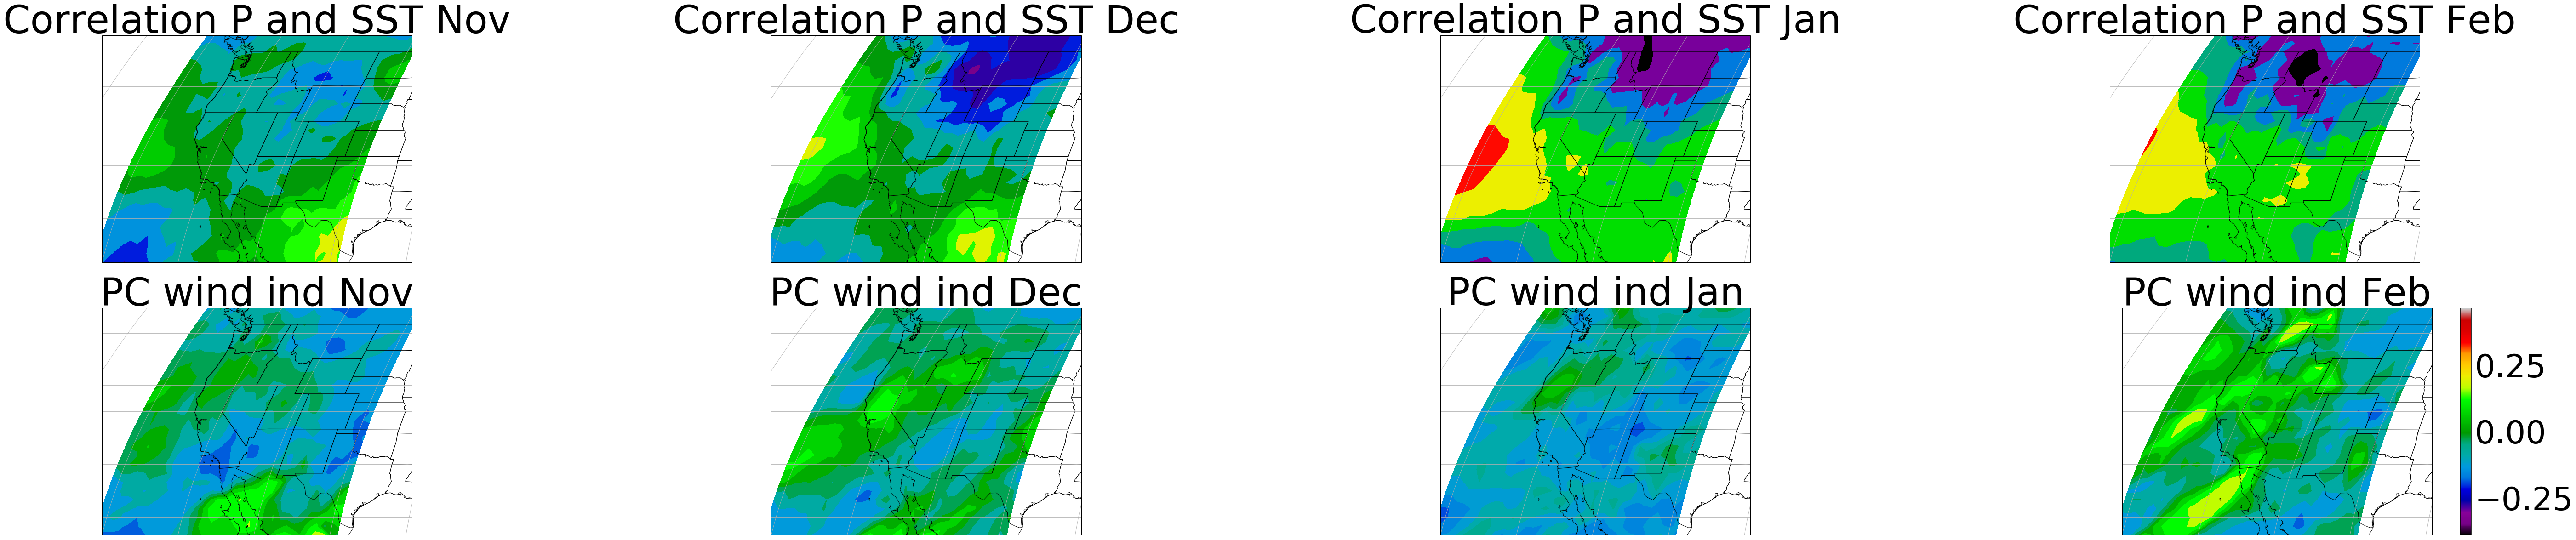

In [272]:
font = { 'family' : 'normal',
         'size'   : 70 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual1_for=min(minim_cpn_for,min(minlist))
maxim_dual1_for=max(maxim_cpn_for,max(maxlist))
title_data=["Correlation P and SST ","PC wind ind "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_adjtime.sel(T=sstforcast_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpn[monthnum[i]-1],partialcorr(sstmonth,windanom,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual1_for,maxim_dual1_for,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual1_for,maxim_dual1_for,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual1_for,vmax=maxim_dual1_for,cmap='nipy_spectral')
plt.colorbar()
plt.show()

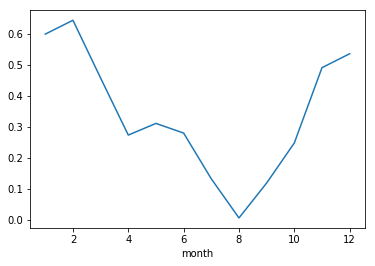

In [277]:
font = { 'family' : 'normal',
         'size'   : 10 }
plt.rc('font', **font)
windanom=wforcast_adjtime.groupby("T.month")-wforcast_adjtime.groupby("T.month").mean("T")
sstanom=sstforcast_adjtime.groupby("T.month")-sstforcast_adjtime.groupby("T.month").mean("T")
Swn=(windanom.ua*sstanom.ts).groupby("T.month").mean(["T","M"])
Sw = windanom.ua.groupby('T.month').std(['T','M'])
Sn = sstanom.ts.groupby('T.month').std(['T',"M"])
Cwn=Swn/Sn/Sw

Cwn.plot()

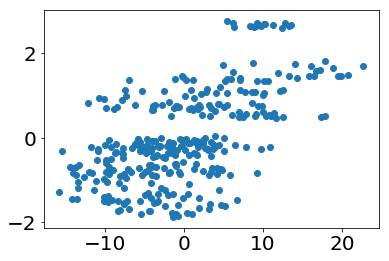

In [278]:
font = { 'family' : 'normal',
         'size'   : 20 }
plt.rc('font', **font)
wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==1)
sstmonth=sstforcast_adjtime.sel(T=sstforcast_adjtime["T.month"]==1)
sstmonth=sstmonth-sstmonth.mean("T")
windanom=wmonth-wmonth.mean("T")
plt.scatter(windanom.ua,sstmonth.ts)

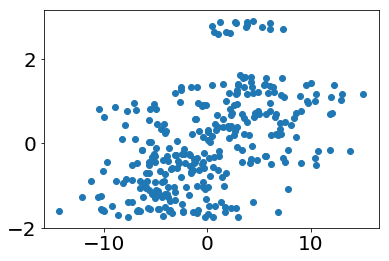

In [279]:
wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==11)
sstmonth=sstforcast_adjtime.sel(T=sstforcast_adjtime["T.month"]==11)
sstmonth=sstmonth-sstmonth.mean("T")
windanom=wmonth-wmonth.mean("T")
plt.scatter(windanom.ua,sstmonth.ts)

In [274]:
minlist=[]
maxlist=[]
for i in [10,11,0,1]:
    minlist.append(np.min(Cpw_for[i]))
    maxlist.append(np.max(Cpw_for[i]))
minim_cpw_for=min(minlist)
maxim_cpw_for=max(maxlist)
print(minim_cpw_for)
print(maxim_cpw_for)

<xarray.DataArray ()>
array(-0.362828)
Coordinates:
    month    int64 1
<xarray.DataArray ()>
array(0.809595)
Coordinates:
    month    int64 1


In [275]:
minlist=[]
maxlist=[]
for i in [11,12,1,2]:
    sst=getmonth(sstforcast_adjtime,i).ts
    rain=getmonth(pforcast_adjtime,i).pr-getmonth(pforcast_adjtime,i).pr.mean("T")
    sst=sst-sst.mean("T")
    windds=getmonth(wforcast_adjtime,i).ua-getmonth(wforcast_adjtime,i).ua.mean("T")
    minlist.append(np.nanmin(partialcorr(windds,sst,rain,"one",(28,33),np.shape(windds)[0])))
    maxlist.append(np.nanmax(partialcorr(windds,sst,rain,"one",(28,33),np.shape(windds)[0])))

/Users/brigidlynch/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


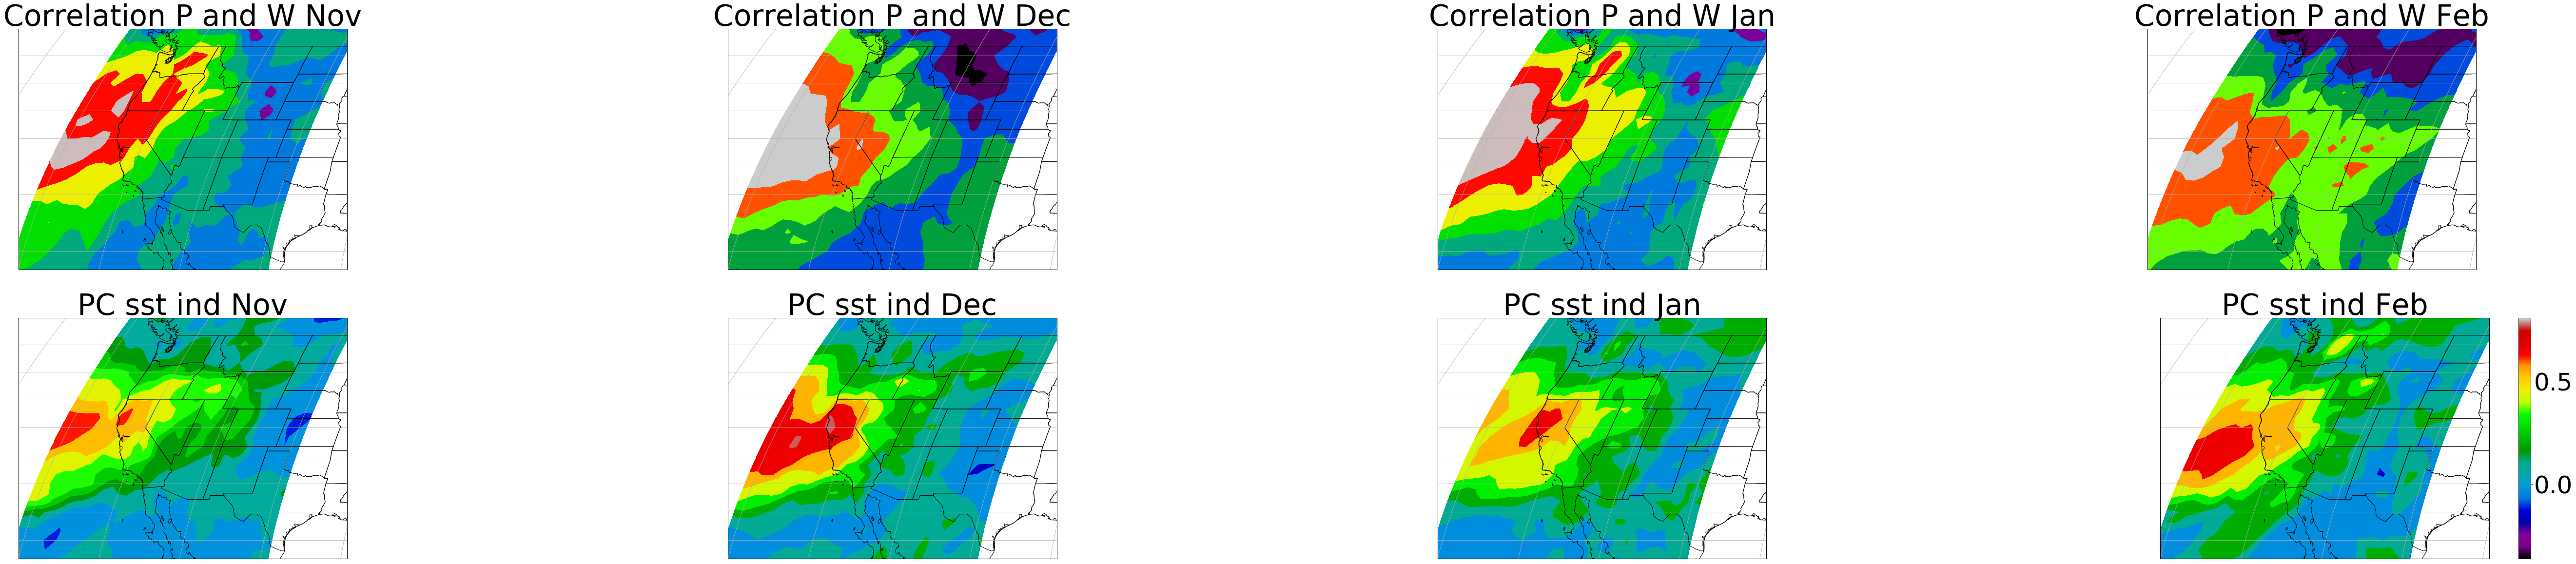

In [280]:
font = { 'family' : 'normal',
         'size'   : 50 }
plt.rc('font', **font)
month=["Nov","Dec","Jan","Feb","Nov","Dec","Jan","Feb"]
monthnum=[11,12,1,2,11,12,1,2]
fig, ax = plt.subplots(ncols=4,nrows=2,subplot_kw={'projection': ccrs.crs.Robinson()},figsize=(100,20))
ax=np.reshape(ax,(8))
[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]=ax
minim_dual2_for=min(minim_cpw_for,min(minlist))
maxim_dual2_for=max(maxim_cpw_for,max(maxlist))
title_data=["Correlation P and W ","PC sst ind "]
#for row in [0,1]:
for i,j in enumerate([ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]):
    pmonth=pforcast_adjtime.sel(T=pforcast_adjtime["T.month"]==monthnum[i])
    rainanom=pmonth - pmonth.mean('T')
    rainanom=rainanom.pr
    wmonth=wforcast_adjtime.sel(T=wforcast_adjtime["T.month"]==monthnum[i]).ua
    sstmonth=sstforcast_adjtime.sel(T=sstforcast_adjtime["T.month"]==monthnum[i])
    sstmonth=sstmonth-sstmonth.mean("T")
    sstmonth=sstmonth.ts
    windanom=wmonth-wmonth.mean("T")
    sstmonth=sstmonth[~np.isnan(windanom).any(axis=1)]
    rainanom=rainanom[~np.isnan(windanom).any(axis=1)]
    windanom=windanom[~np.isnan(windanom).any(axis=1)]
    datas=[Cpw[monthnum[i]-1],partialcorr(windanom,sstmonth,rainanom,1,(28,33),np.shape(windanom)[0])]
    if i<4:
        data=datas[0]
        plotmap(data,title_data[0]+month[i],minim_dual2_for,maxim_dual2_for,resolution="one",ax=j,colorbar="nonauto")
    else:
        data=datas[1]
        plotmap(data,title_data[1]+month[i],minim_dual2_for,maxim_dual2_for,resolution="one",ax=j,colorbar="nonauto")  
plt.imshow(data,vmin=minim_dual2_for,vmax=maxim_dual2_for,cmap='nipy_spectral')
plt.colorbar()
plt.show()

Consider scatterplots of this data for January and November: Do wind and sst have any striking differences during these months (as these maps show) "slope" of january is 2x the size of November 